In [70]:
from pydub import AudioSegment
import os

def split_audio_with_overlap(audio_path, segment_length, overlap_length, output_folder, video_number, segment_number):
   
    audio = AudioSegment.from_file(audio_path)

    
    total_duration = len(audio)

    
    start = 0
    end = segment_length
    segment_index = segment_number

    c=0
    while start < total_duration:
        
        if end > total_duration:
            end = total_duration
            c=c+1
            if c>=1:
                break

        #print("video_number: ", video_number)
        #print("segment_number: ", segment_index)
        #print("start: ", start)
        #print("overlap: ", overlap_length)
        #print("end: ", end)
        #print("\n")

        
        segment = audio[start:end]
        segment.export(os.path.join(output_folder, f"audio_{video_number}_segment_{segment_index}.wav"), format="wav")
        print(output_folder+f"audio_{video_number}_segment_{segment_index}.wav")

        
        start = end - overlap_length
        end = start + segment_length
        segment_index += 1

    return

split_audio_with_overlap("emotion_filesA/sad/03-02-04-02-01-02-04.wav", segment_length=1000, overlap_length=700, output_folder="Audio_test_output/segments/", video_number=1, segment_number=0)

Audio_test_output/segments/audio_1_segment_0.wav
Audio_test_output/segments/audio_1_segment_1.wav
Audio_test_output/segments/audio_1_segment_2.wav
Audio_test_output/segments/audio_1_segment_3.wav
Audio_test_output/segments/audio_1_segment_4.wav
Audio_test_output/segments/audio_1_segment_5.wav
Audio_test_output/segments/audio_1_segment_6.wav
Audio_test_output/segments/audio_1_segment_7.wav
Audio_test_output/segments/audio_1_segment_8.wav
Audio_test_output/segments/audio_1_segment_9.wav
Audio_test_output/segments/audio_1_segment_10.wav


In [71]:
import os
import shutil

folder_path = 'Audio_test_output/segments/'
videos = {}

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):  
        video_id = filename.split('_')[1]
        frame_num = filename.split('_')[3]
        f_num = frame_num.split(".")[0]
        # Add the frame to the corresponding video
        if video_id not in videos:
            videos[video_id] = []
        videos[video_id].append((int(f_num), filename))

# Process each video to ensure it has only 12 frames
for video_id, frames in videos.items():
    frames.sort()  # Sort frames by frame number
    
    # If video has more than 12 frames, adjust the frames
    while len(frames) > 12:
        if len(frames) % 2 == 0:
            # Delete the first frame
            os.remove(os.path.join(folder_path, frames[0][1]))
            del frames[0]
        else:
            # Delete the last frame
            os.remove(os.path.join(folder_path, frames[-1][1]))
            del frames[-1]
     
    # Determine the segment number for new frames
    last_segment_num = int(frames[-1][1].split("_")[-1].split('.')[0])
    
    # Add frames until there are 12 frames
    while len(frames) < 12:
        last_segment_num += 1
        new_filename = f"audio_{video_id}_segment_{last_segment_num}.wav"
        new_segment_filename = os.path.join(folder_path, new_filename)
        # Copy the last frame to create new frames
        shutil.copyfile(os.path.join(folder_path, frames[-1][1]), new_segment_filename)
        frames.append((last_segment_num, new_filename))

# Output a message indicating processing is complete
print("Processing complete. Each video now has 12 frames.")


Processing complete. Each video now has 12 frames.


In [72]:
import numpy as np
import librosa
import librosa.display


def spec_to_image(spec,output_folder,file_new ,eps=1e-6):
        mean = spec.mean()
        std = spec.std()
        spec_norm = (spec - mean) / (std + eps)
        spec_min, spec_max = spec_norm.min(), spec_norm.max()
        spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
        spec_scaled = spec_scaled.astype(np.uint8)
        #mel_spec_db = librosa.power_to_db(spec_scaled)
        # Print the shape of the Mel spectrogram image
        #print("Shape of Mel Spectrogram Image:", spec_scaled.shape)
        # Plot the Mel spectrogram
        #plt.figure(figsize=(10, 4))
        librosa.display.specshow(spec_scaled, sr=22050)
        #output_folder="emotion_filesA/"
        output_path = os.path.join(output_folder,file_new)
        #plt.savefig(output_path,bbox_inches='tight', pad_inches=0, transparent=True)
        cv2.imwrite(output_path,spec_scaled)
        #return mel_spec_db
        return spec_scaled

def get_melspectrogram_db(file_path, sr=22050, n_fft=2048, hop_length=512, n_mels=96, fmin=20, fmax=8000, top_db=80):
    wav,sr = librosa.load(file_path,sr=sr,duration=5) # i added
    if wav.shape[0]<5*sr:#5
        wav=np.pad(wav,int(np.ceil((5*sr-wav.shape[0])/2)),mode='reflect')#5
    else:
        wav=wav[:5*sr]#5
    spec=librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft,hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
    spec_db=librosa.power_to_db(spec,top_db=top_db)
    return spec_db

def get_audio(spec, sr=22050, n_fft=2048, hop_length=512, n_mels=96, fmin=20, fmax=8000, top_db=80):
                                           res = librosa.feature.inverse.mel_to_audio(spec,
                                           sr=sr,
                                           n_fft=2048,
                                           hop_length=512,
                                           win_length=None,
                                           window='hann',
                                           center=True,
                                           pad_mode='reflect',
                                           power=2.0,
                                           n_iter=32)
  

Audio_test_output/segments/
Mel_Spectrogram_img saved in Audio_test_output/mel_output/segments_mel/mel_audio_1_segment_0.jpg
Mel_Spectrogram_img saved in Audio_test_output/mel_output/segments_mel/mel_audio_1_segment_1.jpg
Mel_Spectrogram_img saved in Audio_test_output/mel_output/segments_mel/mel_audio_1_segment_10.jpg
Mel_Spectrogram_img saved in Audio_test_output/mel_output/segments_mel/mel_audio_1_segment_11.jpg
Mel_Spectrogram_img saved in Audio_test_output/mel_output/segments_mel/mel_audio_1_segment_2.jpg
Mel_Spectrogram_img saved in Audio_test_output/mel_output/segments_mel/mel_audio_1_segment_3.jpg
Mel_Spectrogram_img saved in Audio_test_output/mel_output/segments_mel/mel_audio_1_segment_4.jpg
Mel_Spectrogram_img saved in Audio_test_output/mel_output/segments_mel/mel_audio_1_segment_5.jpg
Mel_Spectrogram_img saved in Audio_test_output/mel_output/segments_mel/mel_audio_1_segment_6.jpg
Mel_Spectrogram_img saved in Audio_test_output/mel_output/segments_mel/mel_audio_1_segment_7.jpg


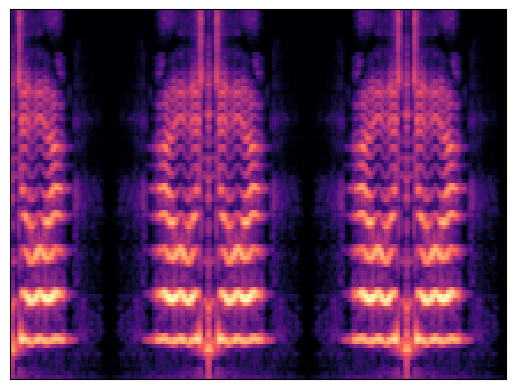

In [73]:
import cv2
directory = 'Audio_test_output/segments/'
output_folder="Audio_test_output/mel_output/"
for dirpath, dirnames, filenames in os.walk(directory):
    print(dirpath)
    #folder_name=dirpath.split('/')[1]+"_mel"
    audio_number = 0  
    for filename in filenames:
        #print(filename)
        fd = str(dirpath.split("/")[1])
        output_folder = "Audio_test_output/mel_output/" + fd + "_mel/"
        os.makedirs(output_folder, exist_ok=True)
        file_new="mel_"+str(filename.split('.')[0])+".jpg"
        spec=get_melspectrogram_db(dirpath+"/"+filename)
        
        spec_to_image(spec,output_folder,file_new)
        print(f'Mel_Spectrogram_img saved in {output_folder}{file_new}')
        #fd = str(dirpath.split("/")[1])
        #output_folder = "Audio-Output/" + fd + "_segment/"
        #os.makedirs(output_folder, exist_ok=True)
        #split_audio_with_overlap(os.path.join(dirpath, filename), segment_length=1000, overlap_length=700, output_folder=output_folder, video_number=audio_number, segment_number=0)
        audio_number += 1

In [74]:
import os
import cv2
import numpy as np

# Directory containing the spectrogram images
folder_path = "Audio_test_output/mel_output/segments_mel"
num_frames = 12
height = 96
width = 216
channels = 3

# Initialize an empty list to store the sequences
sequence_list = []

# Iterate through the images in the folder
for i in range(len(os.listdir(folder_path)) - num_frames + 1):
    # Initialize an empty list to store frames for each sequence
    frames = []
    # Iterate through the frames in the segment
    for j in range(num_frames):
        # Load the image
        filename = os.listdir(folder_path)[i + j]
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        # Resize the image
        resized_image = cv2.resize(image, (width, height))
        # Convert BGR to RGB
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
        # Append the resized image to the frames list
        frames.append(resized_image)
    # Append the sequence of frames to the sequence list
    sequence_list.append(frames)

# Convert the list of sequences to a NumPy array
sequence_array = np.array(sequence_list)

# Print the shape of the sequence array
print("Shape of the sequence array:", sequence_array.shape)


Shape of the sequence array: (1, 12, 96, 216, 3)


In [75]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('CRNN_model.h5')

# Now you can use the loaded model for prediction or further training
# Assuming you have new data stored in a variable called 'new_data'
#predictions = loaded_model.predict(new_data)

# Use the predictions as needed
#loaded_model.summary()

In [76]:
# Define emotion classes
emotion_classes = ['angry', 'calm', 'fearful', 'happy', 'neutral', 'sad']

# Make predictions
predictions = loaded_model.predict(sequence_array)

# Get the index of the maximum probability for each prediction
max_prob_indices = np.argmax(predictions, axis=1)

# Map the indices to emotion classes
predicted_emotions = [emotion_classes[idx] for idx in max_prob_indices]

# Print the predicted emotions
print("Predicted Emotions:")
for emotion in predicted_emotions:
    print(emotion)


1/1 [==============================] - 2s 2s/step
Predicted Emotions:
sad
